In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


# Importing Deep Learning Libraries

from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from PIL import Image
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import Callback
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense


 **Displaying images**

In [52]:
picture_size = 48
folder_path = "images/"

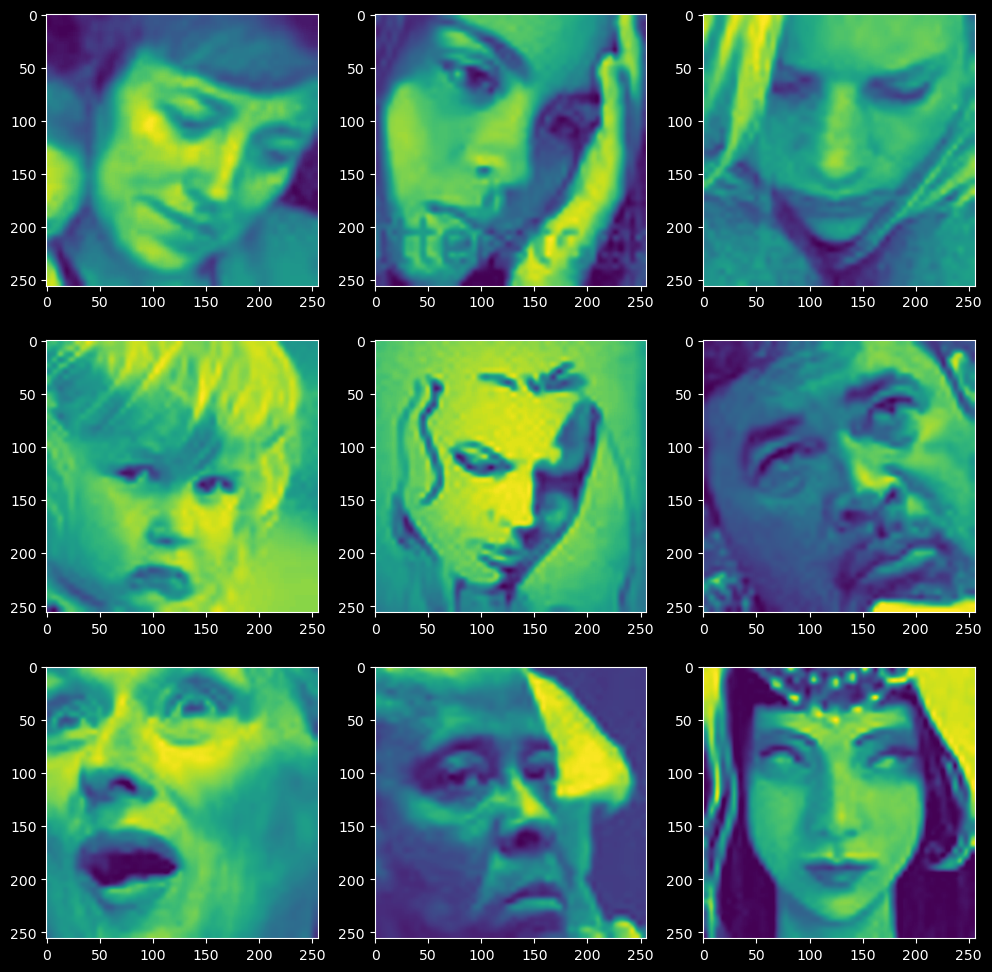

In [53]:

expression = 'sad'
picture_size = 256  # Update with your desired picture size

plt.figure(figsize=(12, 12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = Image.open(os.path.join(folder_path, "train", expression,
                                   os.listdir(os.path.join(folder_path, "train", expression))[i])).resize((picture_size, picture_size))
    plt.imshow(img)
plt.show()


**Making Training and Validation Data**

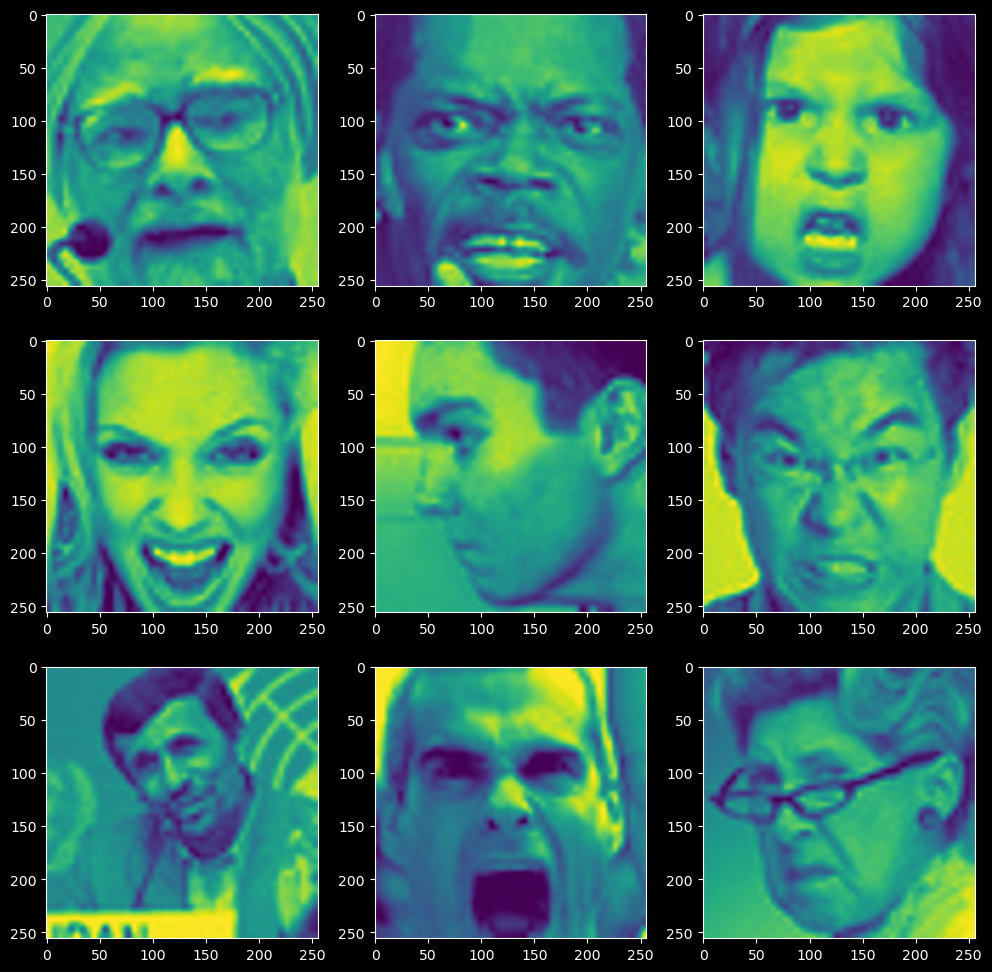

In [54]:

expression = 'Angry'
picture_size = 256  # Update with your desired picture size

plt.figure(figsize=(12, 12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = Image.open(os.path.join(folder_path, "train", expression,
                                   os.listdir(os.path.join(folder_path, "train", expression))[i])).resize((picture_size, picture_size))
    plt.imshow(img)
plt.show()


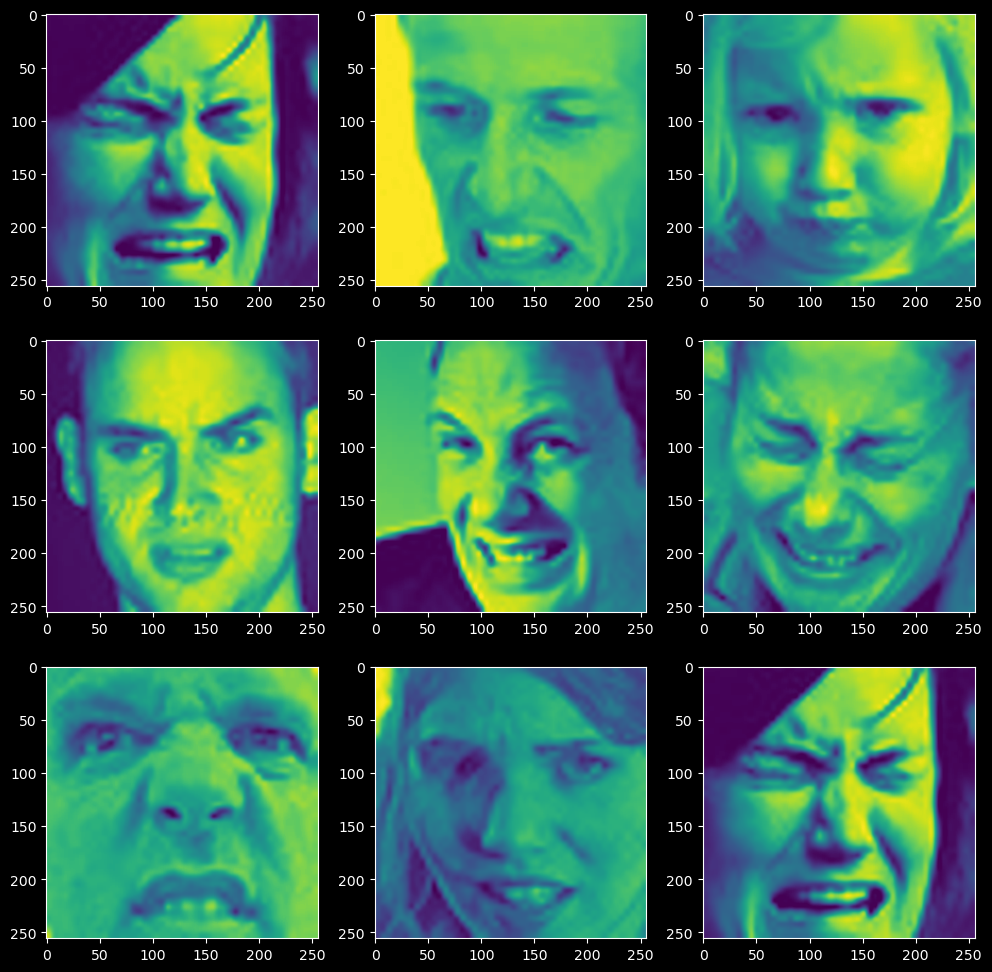

In [55]:

expression = 'disgust'
picture_size = 256  # Update with your desired picture size

plt.figure(figsize=(12, 12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = Image.open(os.path.join(folder_path, "train", expression,
                                   os.listdir(os.path.join(folder_path, "train", expression))[i])).resize((picture_size, picture_size))
    plt.imshow(img)
plt.show()


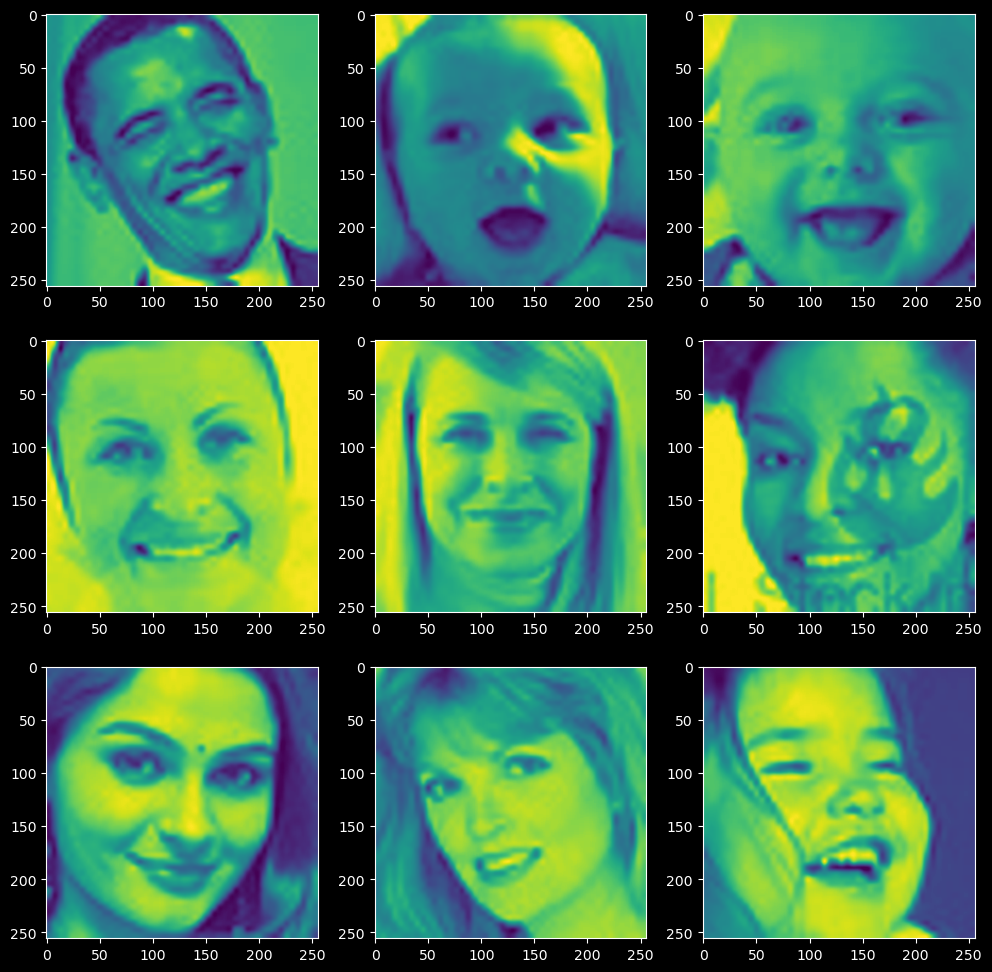

In [56]:

expression = 'happy'
picture_size = 256  # Update with your desired picture size

plt.figure(figsize=(12, 12))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    img = Image.open(os.path.join(folder_path, "train", expression,
                                   os.listdir(os.path.join(folder_path, "train", expression))[i])).resize((picture_size, picture_size))
    plt.imshow(img)
plt.show()


In [57]:


# Define batch size and picture size
batch_size = 128
picture_size = 256

# Create data generators for training and validation data
datagen_train = ImageDataGenerator()  # Data generator for training data
datagen_val = ImageDataGenerator()  # Data generator for validation data

# Set up data generator for training data
train_set = datagen_train.flow_from_directory(os.path.join(folder_path, "train"),
                                              target_size=(picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)
# Print information about the training data generator
print("Found", train_set.samples, "images belonging to", train_set.num_classes, "classes in the training set")

# Set up data generator for validation data
test_set = datagen_val.flow_from_directory(os.path.join(folder_path, "validation"),
                                             target_size=(picture_size, picture_size),
                                             color_mode="grayscale",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=False)
# Print information about the validation data generator
print("Found", test_set.samples, "images belonging to", test_set.num_classes, "classes in the validation set")


Found 28821 images belonging to 7 classes.
Found 28821 images belonging to 7 classes in the training set
Found 7066 images belonging to 7 classes.
Found 7066 images belonging to 7 classes in the validation set


**Model Building**

In [58]:


no_of_classes = 7

# Create a sequential model
model = Sequential()

# Add the 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add the 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# Add the fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Add the fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Add the output layer with softmax activation for classification
model.add(Dense(no_of_classes, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 24, 24, 128)     

c:\Users\KALITOH\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Fitting the Model with Training and Validation Data**

In [59]:


checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [60]:


# Define a custom callback for early stopping or other purposes
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Add your custom logic here
        pass

# Instantiate the custom callback
my_callback = MyCallback()

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
num_classes = 7  # There are 7 classes in the dataset
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create data generators with limited number of samples
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Specify the number of samples to be drawn from the generators
train_steps_per_epoch = 10 # Update this to the desired number of steps for training
val_steps_per_epoch = 5 # Update this to the desired number of steps for validation

# Update train_dir and test_dir to the paths of your training and test data directories, respectively
train_dir = 'images/images/train/'
validation_dir = 'images/images/validation/'

# Train the model with fit_generator
history = model.fit_generator(generator=train_datagen.flow_from_directory(train_dir, target_size=(48, 48), batch_size=batch_size, color_mode='grayscale', class_mode='categorical'),
                              steps_per_epoch=train_steps_per_epoch,
                              epochs=5, # Update this to the desired number of epochs
                              validation_data=test_datagen.flow_from_directory(validation_dir, target_size=(48, 48), batch_size=batch_size, color_mode='grayscale', class_mode='categorical'),
                              validation_steps=val_steps_per_epoch,
                              callbacks=[my_callback])


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


C:\Users\KALITOH\AppData\Local\Temp\ipykernel_21984\3747921864.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_datagen.flow_from_directory(train_dir, target_size=(48, 48), batch_size=batch_size, color_mode='grayscale', class_mode='categorical'),


Epoch 1/5
10/10 [==============================] - 8s 733ms/step - loss: 1.8760 - accuracy: 0.1891 - val_loss: 1.8243 - val_accuracy: 0.2594
Epoch 2/5
10/10 [==============================] - 6s 614ms/step - loss: 1.8406 - accuracy: 0.2477 - val_loss: 1.8522 - val_accuracy: 0.2547
Epoch 3/5
10/10 [==============================] - 5s 534ms/step - loss: 1.8335 - accuracy: 0.2391 - val_loss: 1.7889 - val_accuracy: 0.2688
Epoch 4/5
10/10 [==============================] - 5s 501ms/step - loss: 1.8150 - accuracy: 0.2320 - val_loss: 1.8056 - val_accuracy: 0.2609
Epoch 5/5
10/10 [==============================] - 5s 492ms/step - loss: 1.8078 - accuracy: 0.2500 - val_loss: 1.7961 - val_accuracy: 0.2625


**Plotting Accuracy and Loss**

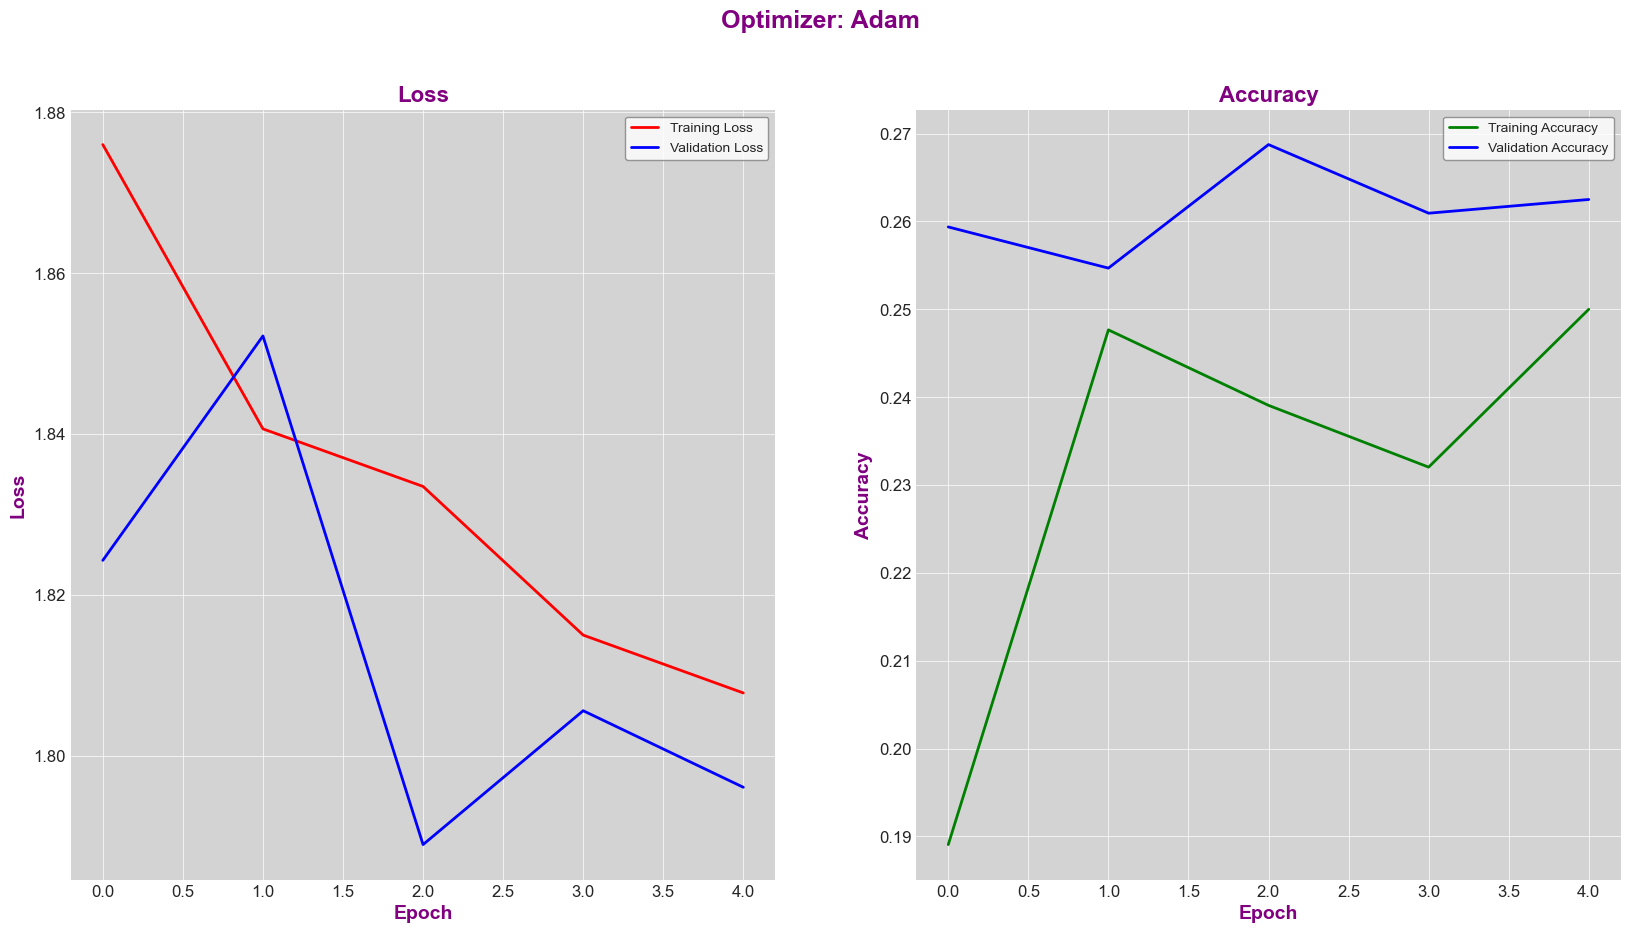

In [77]:
# Set the style for the plot
plt.style.use('seaborn-darkgrid')

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
plt.suptitle('Optimizer: Adam', fontsize=18, fontweight='bold', color='purple')

# Plot training and validation loss on the first subplot
axes[0].set_title('Loss', fontsize=16, fontweight='bold', color='blue')
axes[0].set_xlabel('Epoch', fontsize=14, fontweight='bold', color='purple')
axes[0].set_ylabel('Loss', fontsize=14, fontweight='bold', color='purple')
axes[0].plot(history.history['loss'], label='Training Loss', color='red', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', color='blue', linewidth=2)
axes[0].legend(loc='upper right', fontsize=12)

# Plot training and validation accuracy on the second subplot
axes[1].set_title('Accuracy', fontsize=16, fontweight='bold', color='blue')
axes[1].set_xlabel('Epoch', fontsize=14, fontweight='bold', color='purple')
axes[1].set_ylabel('Accuracy', fontsize=14, fontweight='bold', color='purple')
axes[1].plot(history.history['accuracy'], label='Training Accuracy', color='green', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue', linewidth=2)
axes[1].legend(loc='lower right', fontsize=12)

# Set the background color of the subplots
axes[0].set_facecolor('lightgray')
axes[1].set_facecolor('lightgray')

# Set the title color of the subplots
for ax in axes:
    ax.title.set_color('purple')

# Set the tick label font size
axes[0].tick_params(axis='both', labelsize=12)
axes[1].tick_params(axis='both', labelsize=12)

# Set the spines color
axes[0].spines['bottom'].set_color('gray')
axes[0].spines['top'].set_color('gray')
axes[0].spines['left'].set_color('gray')
axes[0].spines['right'].set_color('gray')
axes[1].spines['bottom'].set_color('gray')
axes[1].spines['top'].set_color('gray')
axes[1].spines['left'].set_color('gray')
axes[1].spines['right'].set_color('gray')

# Set the grid color
axes[0].grid(color='white', linestyle='-', linewidth=0.5)
axes[1].grid(color='white', linestyle='-', linewidth=0.5)

# Set the legend frame color
axes[0].legend(frameon=True, facecolor='white', edgecolor='gray', framealpha=0.8)
axes[1].legend(frameon=True, facecolor='white', edgecolor='gray', framealpha=0.8)

# Show the plot
plt.show()
